# Dataset Link 
#### https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Neural Network
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Loading Data

In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.1,
    rotation_range = 5,
    horizontal_flip = True,
    validation_split=0.3)

In [4]:
training_set = datagen.flow_from_directory('data/train',subset='training',
                                           class_mode = 'binary',batch_size=64,shuffle=True,color_mode='grayscale')

val_set = datagen.flow_from_directory('data/train',subset='validation',
                                      class_mode = 'binary',batch_size=64,shuffle=True,color_mode='grayscale')

Found 9525 images belonging to 2 classes.
Found 4081 images belonging to 2 classes.


# Showing image from each class

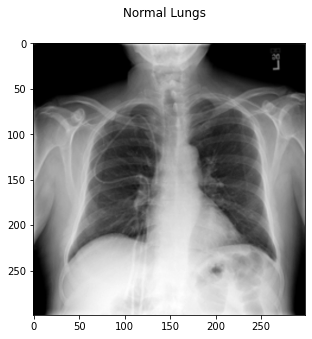

In [5]:
image = plt.imread("data/train/Normal/Normal-10043.png")
fig = plt.figure(figsize=(5,5))
fig.suptitle("Normal Lungs")
plt.imshow(image,cmap="gray")

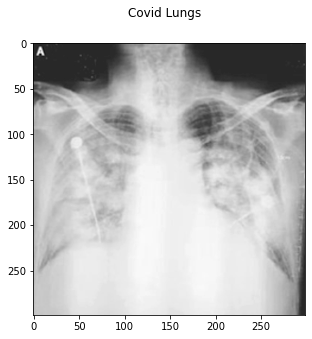

In [7]:
image = plt.imread("data/train/COVID/COVID-1046.png")
fig = plt.figure(figsize=(5,5))
fig.suptitle("Covid Lungs")
plt.imshow(image,cmap="gray")

# Constructing model

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",
             optimizer = 'adam',
             metrics = ["accuracy"])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

# Fitting model

In [12]:
history= model.fit(training_set,
                         steps_per_epoch = training_set.samples//training_set.batch_size,
                         epochs = 20,
                         validation_data = val_set,
                         validation_steps = val_set.samples//val_set.batch_size)

Epoch 1/20
148/148 [==============================] - 958s 6s/step - loss: 0.4876 - accuracy: 0.7689 - val_loss: 0.3638 - val_accuracy: 0.8323
Epoch 2/20
148/148 [==============================] - 556s 4s/step - loss: 0.3409 - accuracy: 0.8500 - val_loss: 0.2783 - val_accuracy: 0.8914
Epoch 3/20
148/148 [==============================] - 541s 4s/step - loss: 0.2798 - accuracy: 0.8816 - val_loss: 0.2430 - val_accuracy: 0.8976
Epoch 4/20
148/148 [==============================] - 540s 4s/step - loss: 0.2266 - accuracy: 0.9092 - val_loss: 0.2038 - val_accuracy: 0.9115
Epoch 5/20
148/148 [==============================] - 530s 4s/step - loss: 0.1979 - accuracy: 0.9262 - val_loss: 0.1826 - val_accuracy: 0.9271
Epoch 6/20
148/148 [==============================] - 538s 4s/step - loss: 0.1681 - accuracy: 0.9366 - val_loss: 0.1786 - val_accuracy: 0.9325
Epoch 7/20
148/148 [==============================] - 572s 4s/step - loss: 0.1463 - accuracy: 0.9433 - val_loss: 0.1562 - val_accuracy: 0.9392

## Showing accuracy

In [13]:
print("Training Accuracy: "+str(np.round(history.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(history.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 97.62%
Validation Accuracy: 97.02%


# Visualization

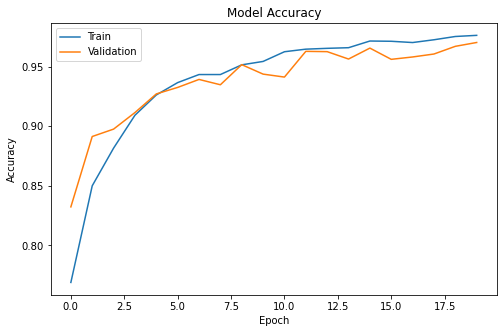

In [14]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

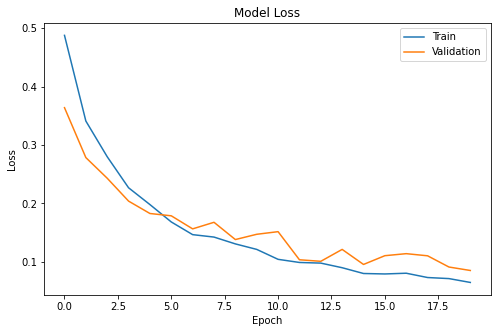

In [15]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

# Loading test data

In [9]:
testdatagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.1,
    rotation_range = 5,
    horizontal_flip = True,
    )
test_set = testdatagen.flow_from_directory('data/test',class_mode = 'binary',batch_size=64,shuffle=True,color_mode='grayscale')

Found 200 images belonging to 2 classes.


In [11]:
test_result = model.evaluate(test_set)
print("Test Accuracy: "+str(np.round(test_result[1]*100,2))+"%")
print("Test Loss: "+str(np.round(test_result[0]*100,2))+"%")

4/4 [==============================] - 2s 495ms/step - loss: 0.0399 - accuracy: 0.9900
Test Accuracy: 99.0%
Test Loss: 3.99%


## Saving model

In [19]:
model.save('model.h5')

### showing indices to predict images

In [22]:
training_set.class_indices

{'COVID': 0, 'Normal': 1}

# Predicting

### Normal

Normal


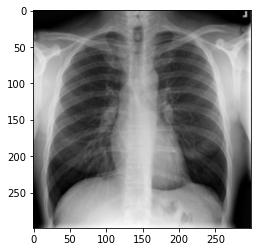

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
test_img = load_img("data/test/NORMAL/Normal-10113.png",color_mode="grayscale",target_size=(256,256,1))
test_img = img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = model.predict(test_img)
if result == 1:
    print("Normal")
else:
    print("Covid-19")
image = plt.imread("data/test/NORMAL/Normal-10113.png")
plt.imshow(image,cmap="gray")

### Coivd

Covid-19


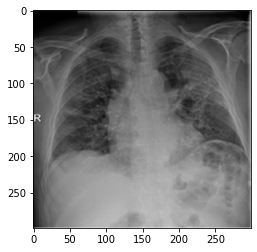

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
test_img = load_img("data/test/Covid/COVID-3527.png",color_mode="grayscale",target_size=(256,256,1))
test_img = img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = model.predict(test_img)
if result == 1:
    print("Normal")
else:
    print("Covid-19")
image = plt.imread("data/test/Covid/COVID-3527.png")
plt.imshow(image,cmap="gray")

# Loading model

In [2]:
model = load_model("model.h5")

# Layers of model

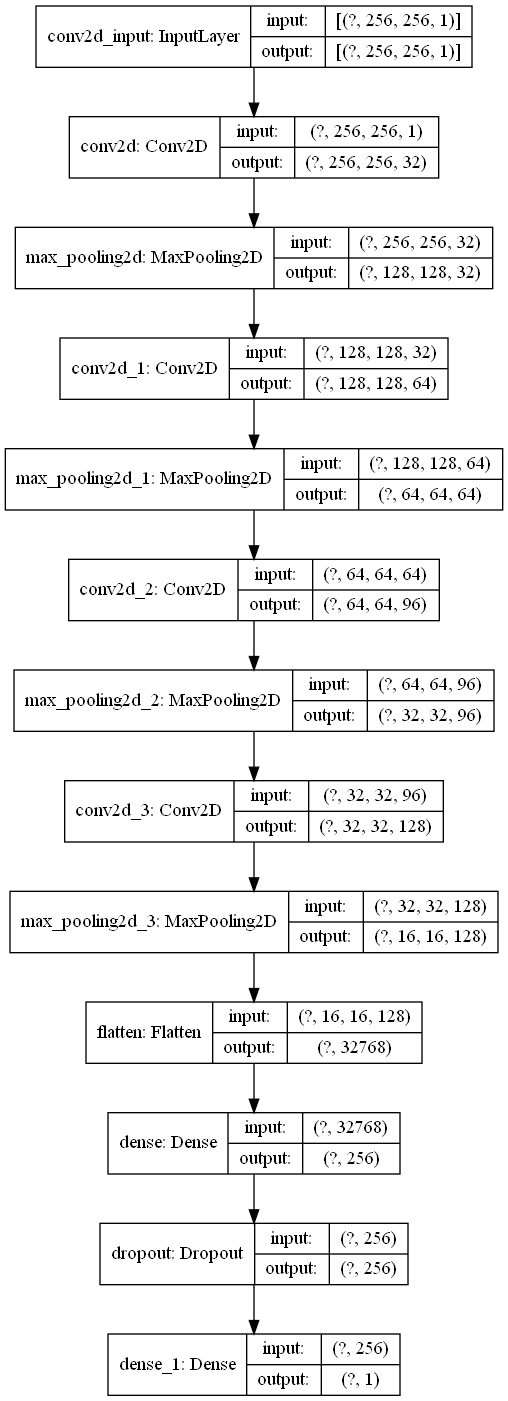

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)